In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Read Cleaned csv file into a pandas dataframe
df_n = pd.read_csv('../data/nonlinear_rockies_data.csv')

# Inferential Modeling

.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble 
from statsmodels.discrete.discrete_model import Logit


In [29]:
df_model.columns

Index(['Unnamed: 0', 'ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'Distance(mi)', 'Description', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Year', 'Month',
       'Weekday', 'Day', 'Hour', 'Rush Hour', 'Weekend', 'Region',
       'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm',
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'Side_R'],
      dtype='object')

In [42]:
features = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]


In [43]:
features.head().T

,617,1195,1897,4113,4928
Temperature(F),0.542373,0.597072,0.604777,0.687982,0.582049
Humidity(%),0.666667,0.646465,0.545455,0.323232,0.797980
Pressure(in),0.525295,0.519231,0.517498,0.517845,0.518711
Visibility(mi),0.071030,0.071030,0.071030,0.042447,0.071030
Wind_Speed(mph),0.005894,0.005894,0.015244,0.010569,0.007012
Precipitation(in),0.000000,0.000000,0.000000,0.000000,0.000000
Amenity,0.000000,0.000000,0.000000,0.000000,0.000000
Bump,0.000000,0.000000,0.000000,0.000000,0.000000
Crossing,0.000000,0.000000,0.000000,0.000000,0.000000
Give_Way,0.000000,0.000000,0.000000,0.000000,0.000000


### Random Forest

In [30]:
#  Random Forest

features = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
                     'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

X= features
y = df_model['Severity'].values


classify = RandomForestClassifier(n_estimators = 100)
classify.fit(X, y)
y_pred = classify.predict(X)

print(classification_report(y, y_pred, target_names=['Non-Severe', 'Severe']))

              precision    recall  f1-score   support

  Non-Severe       1.00      1.00      1.00      5873
      Severe       1.00      1.00      1.00      5873

    accuracy                           1.00     11746
   macro avg       1.00      1.00      1.00     11746
weighted avg       1.00      1.00      1.00     11746



### Random Forest with Model Tuning - hyperparams

### ROCKIES

In [33]:
# Another Hyper Tune _ THis one for Recall

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


features = df_model[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]

X= features
y = df_model['Severity'].values



# Number of trees in random forest
n_estimators = [50, 100, 200, 400, 500, 700]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [20, 50, 60, 70, 80, 90]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv =5 , scoring='recall',
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

result = rf_random.fit(X, y)

# rf_random.best_params_
print("Best: %f using %s" % (result.best_score_, result.best_params_))


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 18.1min finished


Best: 0.492590 using {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}


In [62]:
#  Random Forest

# FIRST TRY
# Best: 0.498728 using {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 
# 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True}

# SECOND TRY
# Best: 0.492590 using {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 
#                       'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}


features = df_model[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]

X= features
y = df_model['Severity'].values



classify = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
classify.fit(X, y)
y_pred = classify.predict(X)

print(classification_report(y, y_pred, target_names=['Non-Severe', 'Severe']))

              precision    recall  f1-score   support

  Non-Severe       0.82      0.86      0.84      5873
      Severe       0.86      0.81      0.83      5873

    accuracy                           0.84     11746
   macro avg       0.84      0.84      0.84     11746
weighted avg       0.84      0.84      0.84     11746



In [61]:
# Another Hyper Tune _ THis one for Recall

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


features = df_model[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]

X= features
y = df_model['Severity'].values



# Number of trees in random forest
n_estimators = [50, 100, 200, 400, 500, 700]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [20, 50, 60, 70, 80, 90]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}



rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv =5 , scoring='recall',
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

result = rf_random.fit(X, y)

# rf_random.best_params_
print("Best: %f using %s" % (result.best_score_, result.best_params_))


Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed: 16.4min finished


Best: 0.495825 using {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 70, 'bootstrap': True}


In [63]:
#  Random Forest


features = df_model[['Temperature(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]

X= features
y = df_model['Severity'].values



classify = RandomForestClassifier(n_estimators = 50, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=5)
classify.fit(X, y)
y_pred = classify.predict(X)

print(classification_report(y, y_pred, target_names=['Non-Severe', 'Severe']))

              precision    recall  f1-score   support

  Non-Severe       0.83      0.86      0.85      5873
      Severe       0.86      0.82      0.84      5873

    accuracy                           0.84     11746
   macro avg       0.84      0.84      0.84     11746
weighted avg       0.84      0.84      0.84     11746



### Permution Feature Importance

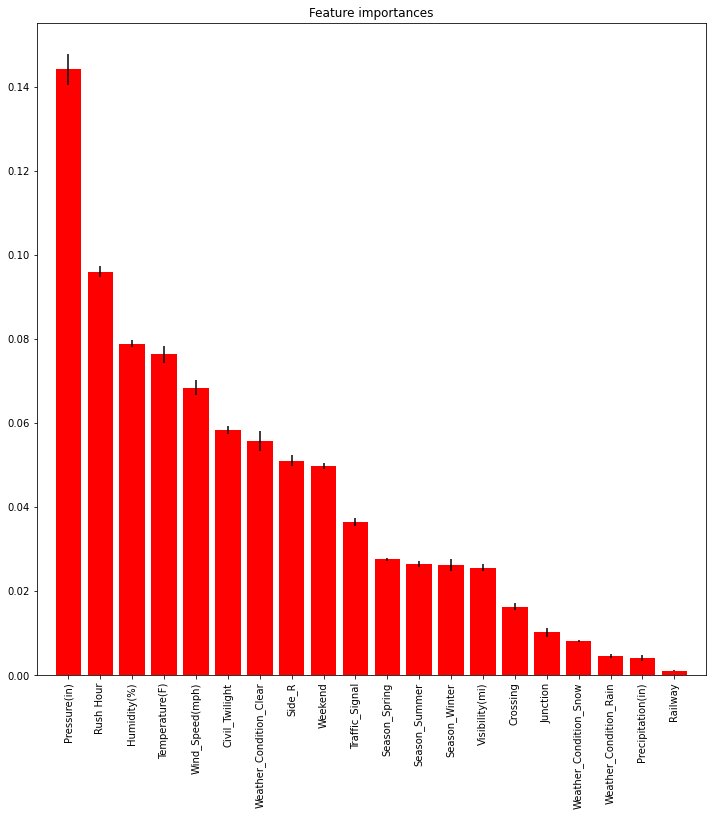

In [35]:
# ROCKIES

from sklearn.inspection import permutation_importance

# Was running for over two hours so I used smaller sample and reduced n_estimators and max_depth slightly

column_names = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]





feature_name = column_names.columns.values
X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)

results = permutation_importance(model, X, y, scoring='f1')

#plot imp 
importance = results.importances_mean
std = results.importances_std
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()



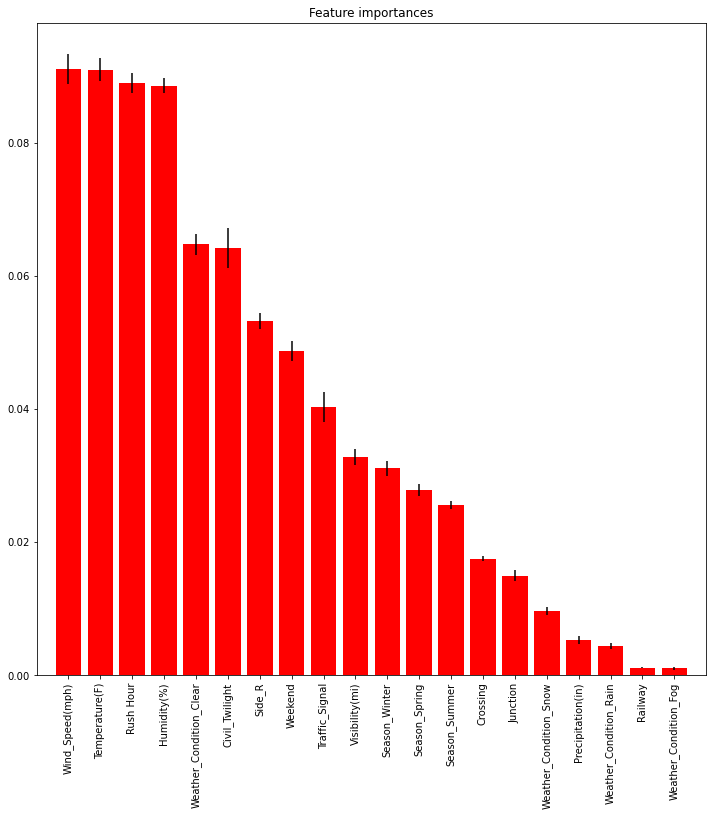

In [65]:
# ROCKIES - drop pressure

from sklearn.inspection import permutation_importance

# Was running for over two hours so I used smaller sample and reduced n_estimators and max_depth slightly

column_names = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]





feature_name = column_names.columns.values
X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)

results = permutation_importance(model, X, y, scoring='f1')

#plot imp 
importance = results.importances_mean
std = results.importances_std
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()



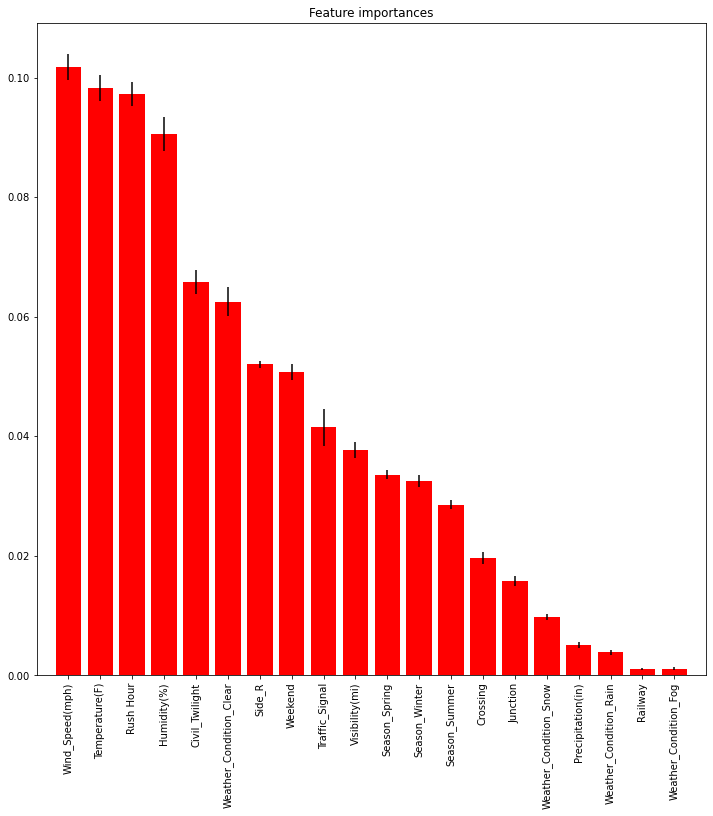

In [66]:
# ROCKIES - drop pressure and tried with second tunes

from sklearn.inspection import permutation_importance

# Was running for over two hours so I used smaller sample and reduced n_estimators and max_depth slightly

column_names = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]





feature_name = column_names.columns.values
X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 50, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=5)
model.fit(X, y)

results = permutation_importance(model, X, y, scoring='f1')

#plot imp 
importance = results.importances_mean
std = results.importances_std
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()



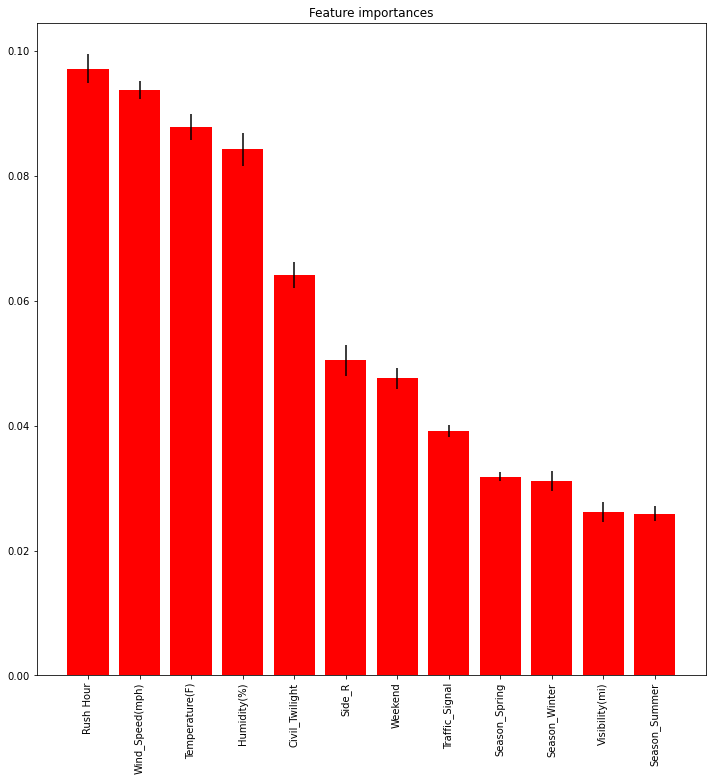

In [73]:
# ROCKIES - drop pressure and top 12 features

from sklearn.inspection import permutation_importance

# Was running for over two hours so I used smaller sample and reduced n_estimators and max_depth slightly

column_names = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]





feature_name = column_names.columns.values
X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 50, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=5)
model.fit(X, y)

results = permutation_importance(model, X, y, scoring='f1')

#plot imp 
importance = results.importances_mean
std = results.importances_std
indices = np.argsort(importance)[::-1][:12]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()



### Plotted overlap to be shown in Powerpoint


''

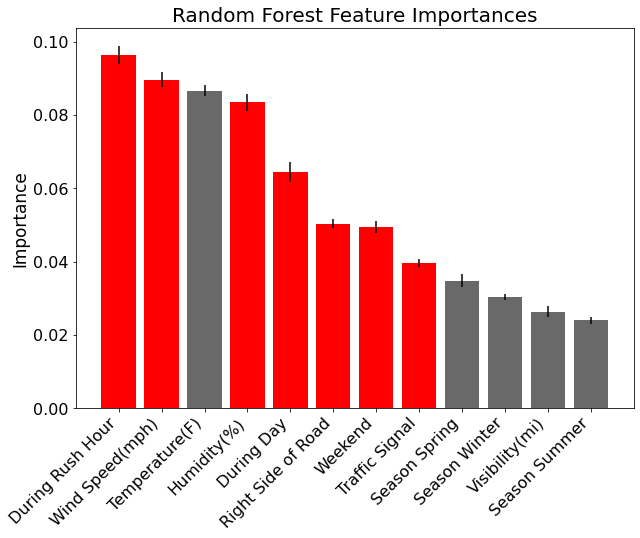

In [110]:
# ROCKIES - drop pressure and top 12 features

from sklearn.inspection import permutation_importance

# Was running for over two hours so I used smaller sample and reduced n_estimators and max_depth slightly



column_names = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]

_X_ = column_names.rename(columns={'Temperature(F)': 'Temperature(F)', 'Humidity(%)': 'Humidity(%)', 
                        'Civil_Twilight': 'During Day',
                        'Rush Hour': 'During Rush Hour',
                         'Wind_Speed(mph)': 'Wind Speed(mph)', 'Traffic_Signal': "Traffic Signal",
                        'Side_R': "Right Side of Road", 'Wind_Speed(mph)': 'Wind Speed(mph)', 
                        'Season_Spring':'Season Spring', 'Season_Summer': 'Season Summer',
                        'Season_Winter': 'Season Winter'
                        })



feature_name = _X_.columns.values 
X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 50, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=5)
model.fit(X, y)

results = permutation_importance(model, X, y, scoring='f1')

#plot imp 
importance = results.importances_mean
std = results.importances_std
indices = np.argsort(importance)[::-1][:12]


plt.figure(figsize=(10,7))
plt.title("Random Forest Feature Importances", fontsize=20)
patches = plt.bar(range(len(indices)), importance[indices], color="dimgray", yerr=std[indices], align="center")
patches[0].set_fc('r')
patches[1].set_fc('r')
patches[3].set_fc('r')
patches[4].set_fc('r')
patches[5].set_fc('r')
patches[6].set_fc('r')
patches[7].set_fc('r')
plt.xticks(range(len(indices)), feature_name[indices], rotation='45', fontsize=16, horizontalalignment='right')
plt.xlim([-1, len(indices)])
plt.ylabel("Importance", fontsize=17)
plt.yticks(fontsize=16)
plt.savefig('rf_featureimportance_update.png', transparent=False, bbox_inches='tight', format='png', dpi=200)
# ax.legend((p1[0], p2[0] ,p3[0]), ('setosa', 'versicolor', 'virginica' ) , bbox_to_anchor=(1.04,1), loc="upper left")
;



In [107]:
# # ROCKIES - added more features

# from sklearn.inspection import permutation_importance

# # Was running for over two hours so I used smaller sample and reduced n_estimators and max_depth slightly

# column_names = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
#        'Wind_Speed(mph)', 'Precipitation(in)', 'Amenity', 'Crossing', 'Give_Way',
#        'Junction', 'Railway',
#         'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
#        'Weather_Condition_Fog', 'Weather_Condition_Other',
#        'Weather_Condition_Rain', 'Weather_Condition_Snow',
#        'Weather_Condition_Thunderstorm', 'Season_Spring',
#        'Season_Summer', 'Season_Winter', 'Side_R']]




# feature_name = column_names.columns.values
# X= column_names
# y = df_model['Severity'].values

# model = RandomForestClassifier(n_estimators = 50, max_features='sqrt', max_depth=70, random_state=42,
#                                  min_samples_leaf = 4, bootstrap = True, min_samples_split=5)
# model.fit(X, y)

# results = permutation_importance(model, X, y, scoring='recall')

# #plot imp 
# importance = results.importances_mean
# std = results.importances_std
# indices = np.argsort(importance)[::-1][:12]

# plt.figure(figsize=(12,12))
# plt.title("Feature importances")
# plt.bar(range(len(indices)), importance[indices], color="r", yerr=std[indices], align="center")
# plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
# plt.xlim([-1, len(indices)])
# plt.show()


### Partial Dependence Plots - Random Forest

In [178]:
# df_model.dtypes

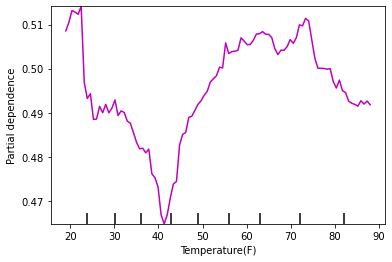

In [67]:
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection import plot_partial_dependence


column_names = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]




X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 50, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=5)
model.fit(X, y)



plot_partial_dependence(model, column_names, ['Temperature(F)'], line_kw={"c": "r"}) 



''

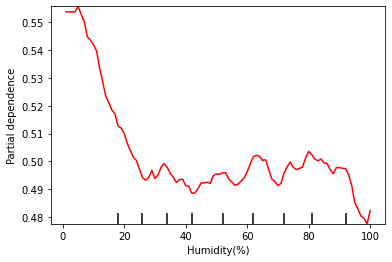

In [81]:
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection import plot_partial_dependence


column_names = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]




X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)



plot_partial_dependence(model, column_names, ['Humidity(%)'], line_kw={"c": "r"}) 
plt.savefig('partial_humid.png', transparent=False, bbox_inches='tight', format='png', dpi=200)
;


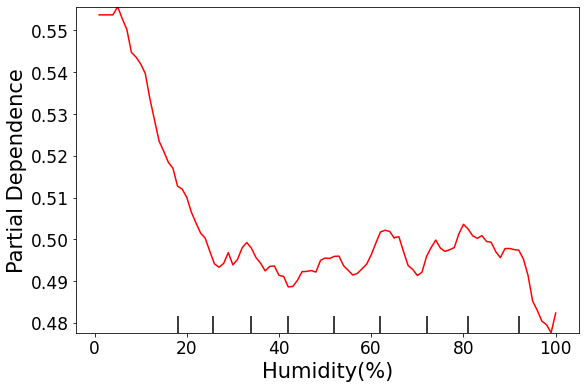

In [103]:
# Try to increase fig size
import matplotlib.pyplot as plt

from sklearn.inspection import plot_partial_dependence


column_names = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]




X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)




fig, ax = plt.subplots(figsize=(9, 6))
mlp_disp = plot_partial_dependence(model, column_names, ['Humidity(%)'], ax=ax, line_kw={"color": "red"})
plt.ylabel("Partial Dependence", fontsize=21)
plt.xlabel('Humidity(%)',fontsize=21)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.savefig('partial_humid_2.png', transparent=False, bbox_inches='tight', format='png', dpi=200)

''

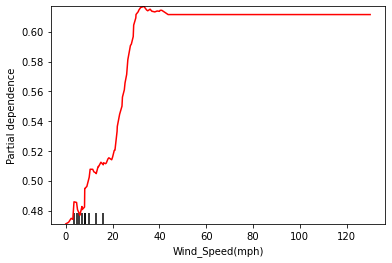

In [82]:
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection import plot_partial_dependence


column_names = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]




X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)



plot_partial_dependence(model, column_names, ['Wind_Speed(mph)'], line_kw={"c": "r"})
plt.savefig('partial_wind.png', transparent=False, bbox_inches='tight', format='png', dpi=200)
;

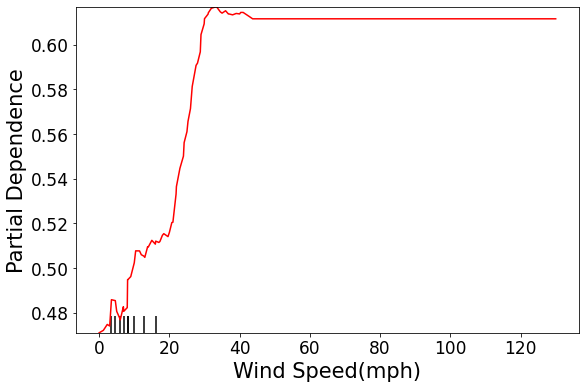

In [105]:
# Try to increase fig size
import matplotlib.pyplot as plt

from sklearn.inspection import plot_partial_dependence


column_names = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]



X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)




fig, ax = plt.subplots(figsize=(9, 6))
mlp_disp = plot_partial_dependence(model, column_names, ['Wind_Speed(mph)'], ax=ax, line_kw={"color": "red"})
plt.ylabel("Partial Dependence", fontsize=21)
plt.xlabel('Wind Speed(mph)',fontsize=21)
plt.xticks(fontsize=17)
plt.yticks(fontsize=17)
plt.savefig('partial_wind_2.png', transparent=False, bbox_inches='tight', format='png', dpi=200)

TypeError: cannot unpack non-iterable PartialDependenceDisplay object

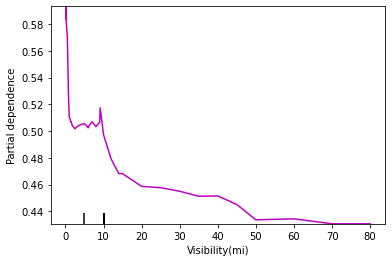

In [70]:
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection import plot_partial_dependence


column_names = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]




X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)



fig, ax = plot_partial_dependence(model, column_names, ['Visibility(mi)'], line_kw={"c": "m"}) 

fig.set_figwidth(8)
fig.set_figheight(15)
fig.tight_layout()

TypeError: cannot unpack non-iterable PartialDependenceDisplay object

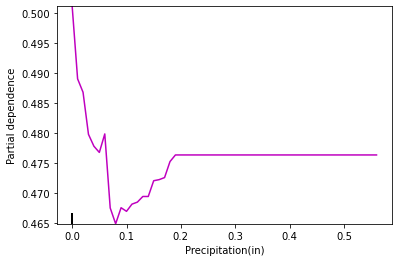

In [57]:
# from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.inspection import plot_partial_dependence


column_names = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]




X= column_names
y = df_model['Severity'].values

model = RandomForestClassifier(n_estimators = 200, max_features='sqrt', max_depth=70, random_state=42,
                                 min_samples_leaf = 4, bootstrap = True, min_samples_split=10)
model.fit(X, y)



fig, ax = plot_partial_dependence(model, column_names, ['Precipitation(in)'], line_kw={"c": "m"}) 

fig.set_figwidth(8)
fig.set_figheight(15)
fig.tight_layout()

## Decision Tree

In [63]:
#  Building Decision Tree Model
features = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]


X= features
y = df_model['Severity'].values


dtf = DecisionTreeClassifier()
dtf.fit(X, y)
y_pred = dtf.predict(X)

print(classification_report(y, y_pred, target_names=['Non-Severe', 'Severe']))

              precision    recall  f1-score   support

  Non-Severe       1.00      1.00      1.00    108821
      Severe       1.00      1.00      1.00    108821

    accuracy                           1.00    217642
   macro avg       1.00      1.00      1.00    217642
weighted avg       1.00      1.00      1.00    217642



In [40]:
# Hypertune the Decision Tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


features = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]

X= features
y = df_model['Severity'].values



param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,12),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}



dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = dt, param_distributions = param_dict, n_iter = 200, cv = 5, scoring='f1',
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

result = rf_random.fit(X, y)

# rf_random.best_params_
print("Best: %f using %s" % (result.best_score_, result.best_params_))


Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    5.7s


Best: 0.558977 using {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 2, 'criterion': 'gini'}


[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    9.5s finished


In [58]:
# Another Try with rockies

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier


features = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]

X= features
y = df_model['Severity'].values



param_dict = {
    "criterion": ['gini', 'entropy'],
    "max_depth": range(1,30),
    "min_samples_split": range(1,10),
    "min_samples_leaf": range(1,5)
}



dt = DecisionTreeClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = dt, param_distributions = param_dict, n_iter = 300, cv = 5, scoring='f1',
                               verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model

result = rf_random.fit(X, y)

# rf_random.best_params_
print("Best: %f using %s" % (result.best_score_, result.best_params_))


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:   22.3s


Best: 0.558977 using {'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 2, 'criterion': 'gini'}


[Parallel(n_jobs=-1)]: Done 1493 out of 1500 | elapsed:   25.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   25.1s finished


In [47]:
#  ROCKIES

# Building Decision Tree Model
features = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Bump', 'Crossing', 'Junction',
       'Railway', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
       'Weather_Condition_Clear',
       'Weather_Condition_Fog', 'Weather_Condition_Other',
       'Weather_Condition_Rain', 'Weather_Condition_Snow',
       'Weather_Condition_Thunderstorm', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Side_R']]


X= features
y = df_model['Severity'].values

# {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 2, 'criterion': 'gini'}

dtf = DecisionTreeClassifier(min_samples_split=7, min_samples_leaf=7, max_depth=3, 
                             criterion = 'gini', random_state=42)
dtf.fit(X, y)
y_pred = dtf.predict(X)

print(classification_report(y, y_pred, target_names=['Non-Severe', 'Severe']))

              precision    recall  f1-score   support

  Non-Severe       0.57      0.79      0.66      5873
      Severe       0.66      0.39      0.49      5873

    accuracy                           0.59     11746
   macro avg       0.61      0.59      0.58     11746
weighted avg       0.61      0.59      0.58     11746



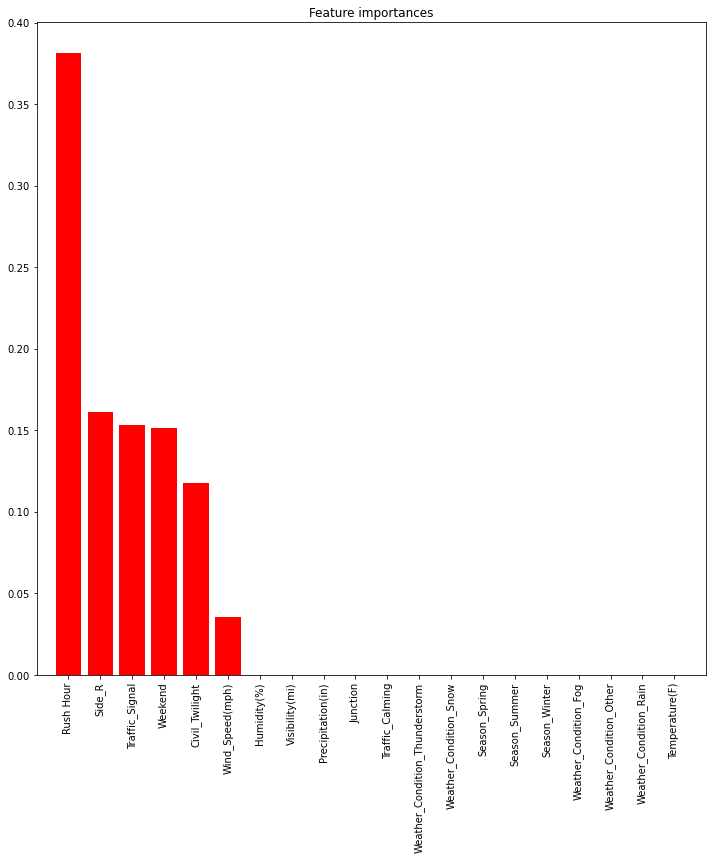

In [109]:
# Feature Importance for Decision Tree with Tuned Params


column_names = df_model[['Temperature(F)', 'Humidity(%)',
        'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
                         'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]





feature_name = column_names.columns.values
X= column_names
y = df_model['Severity'].values

# dtf = DecisionTreeClassifier(max_depth=4)

dtf = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=2, max_depth=3, 
                             criterion = 'entropy', random_state=42)
dtf.fit(X, y)

#plot imp 
importance = dtf.feature_importances_
# std = np.std([tree.feature_importances_ for tree in dtf.estimators_],axis=0)
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

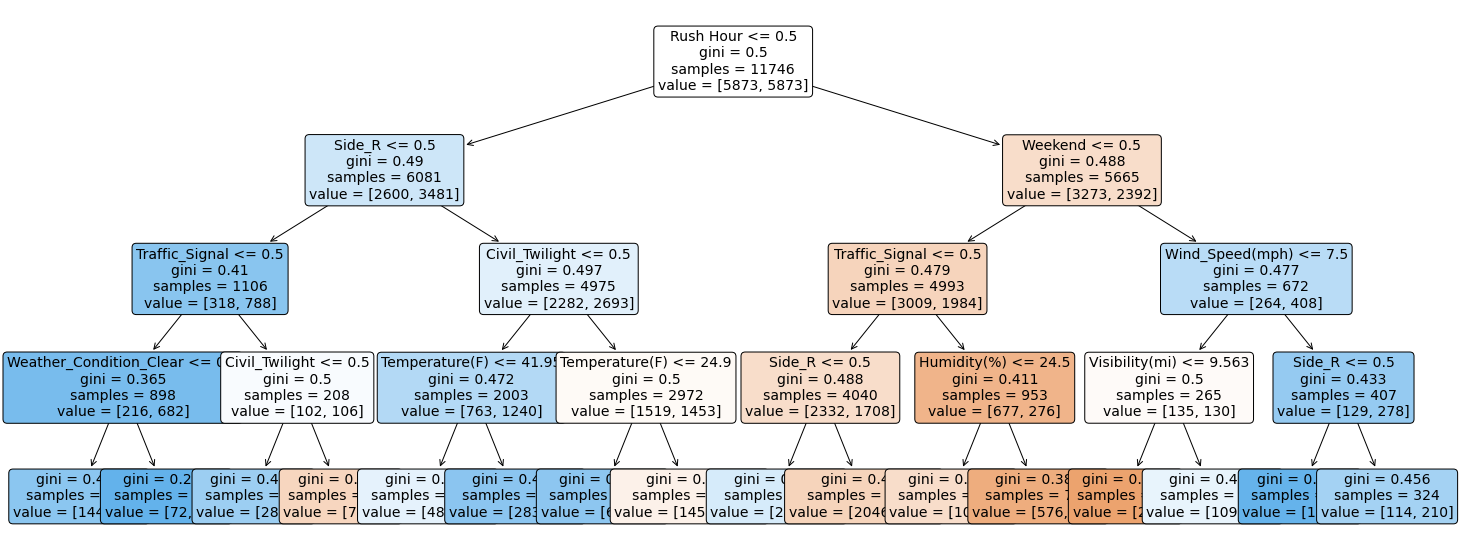

In [84]:
from sklearn.tree import plot_tree

features = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
                     'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]


X= features
y = df_model['Severity']

clf = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=2, max_depth=4, 
                             criterion = 'gini', random_state=42)

clf.fit(X, y)

plt.figure(figsize=(25,10))
a = plot_tree(clf, 
              feature_names=X.columns.to_list(), 
              filled=True, 
              rounded=True, 
              fontsize=14)

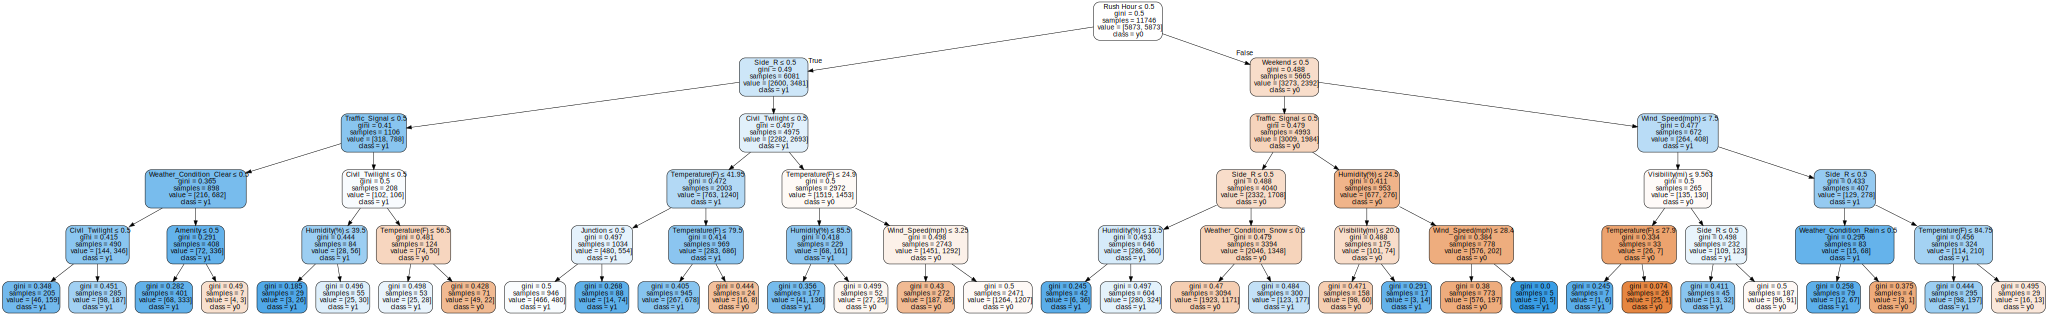

In [86]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
import graphviz

features = df_model[['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend',
                     'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]


X= features
y = df_model['Severity'].values

clf = DecisionTreeClassifier(min_samples_split=6, min_samples_leaf=2, max_depth=5, 
                             criterion = 'gini', random_state=42)
clf.fit(X, y)
dot_data = tree.export_graphviz(clf, 
                  feature_names= X.columns.to_list(), class_names =True,
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                           )
graph = graphviz.Source(dot_data)
graph

### XGBoost

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [70]:
# Removed poor road and traffic conditions

X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

y = df_model['Severity'].values

xg_model = XGBClassifier()
xg_model.fit(X, y)

y_pred = xg_model.predict(X)

print(classification_report(y, y_pred, target_names=['Non-Severe', 'Severe']))

              precision    recall  f1-score   support

  Non-Severe       0.66      0.66      0.66    108821
      Severe       0.66      0.66      0.66    108821

    accuracy                           0.66    217642
   macro avg       0.66      0.66      0.66    217642
weighted avg       0.66      0.66      0.66    217642



In [145]:
#  XGBoost Parameter Tuning


features = small_df[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

X= features
y = small_df['Severity'].values


param_grid = {
        'max_depth': [3, 6, 10, 15, 20],
        'learning_rate': [0.01, 0.1, 0.2, 0.6, 1],
        'subsample': [0.3, 0.5, 0.7, 0.8, 0.9],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': range(150, 1000, 50)}



xg = XGBClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xg_random = RandomizedSearchCV(estimator = xg, param_distributions = param_grid, n_iter = 50, cv = 5, scoring='f1',
                               verbose=2, error_score = 0, random_state=42, n_jobs = -1)
# Fit the random search model

result = xg_random.fit(X, y)

# rf_random.best_params_
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 74.7min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed: 480.8min finished


Best: 0.675305 using {'subsample': 0.7, 'reg_lambda': 5.0, 'n_estimators': 900, 'min_child_weight': 1.0, 'max_depth': 20, 'learning_rate': 0.01, 'gamma': 0.5, 'colsample_bytree': 0.6, 'colsample_bylevel': 0.7}


In [147]:
X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

y = df_model['Severity'].values

xg_model = XGBClassifier(subsample= .7, reg_lambda = 5, n_estimators=900, min_child_weight=1, max_depth=20,
                        learning_rate=.01, gamma = .5, colsample_bytree = .6, colsample_bylevel=.7)
xg_model.fit(X, y)

y_pred = xg_model.predict(X)

print(classification_report(y, y_pred, target_names=['Non-Severe', 'Severe']))

              precision    recall  f1-score   support

  Non-Severe       0.86      0.86      0.86    108821
      Severe       0.86      0.86      0.86    108821

    accuracy                           0.86    217642
   macro avg       0.86      0.86      0.86    217642
weighted avg       0.86      0.86      0.86    217642



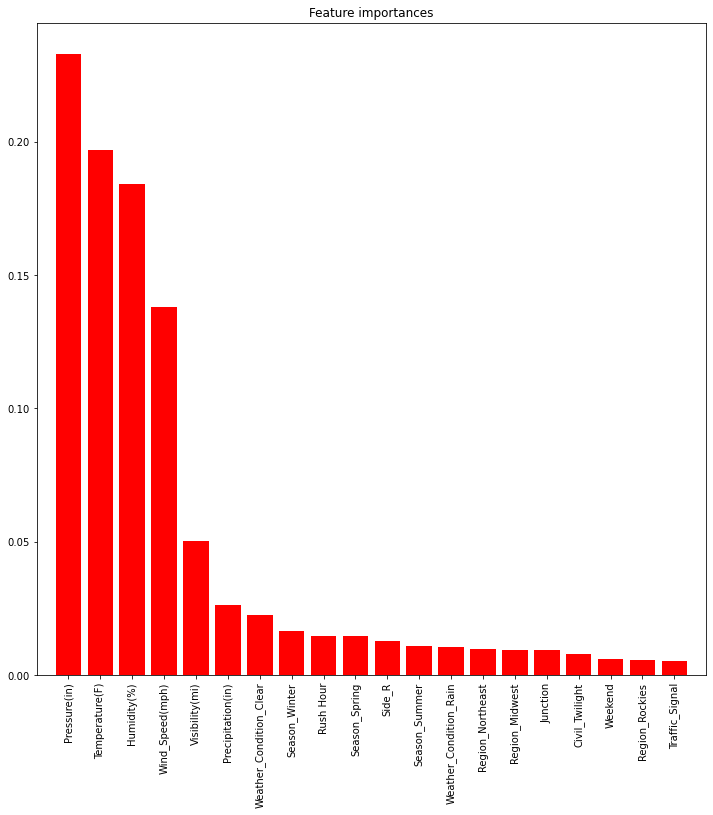

In [149]:
# Feature Importances for XGBoost with modified params


X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

feature_name = X.columns.values


y = df_model['Severity'].values

xg_model = XGBClassifier(subsample= .7, reg_lambda = 5, n_estimators=900, min_child_weight=1, max_depth=20,
                        learning_rate=.01, gamma = .5, colsample_bytree = .6, colsample_bylevel=.7)
xg_model.fit(X, y)


# importance = xg_model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

#plot imp 
importance = xg_model.feature_importances_
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

#### Took a hot minute to load!!!

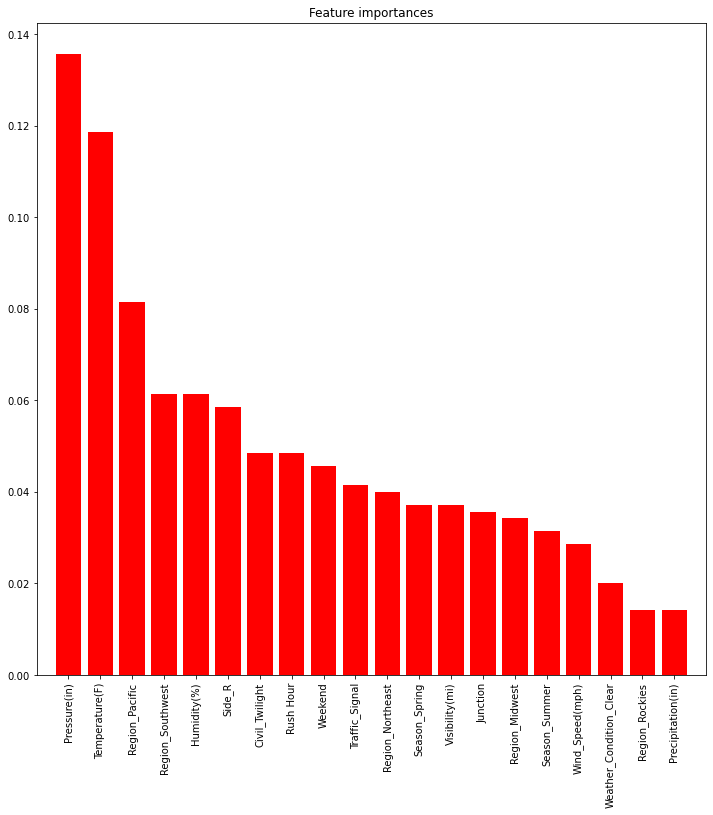

In [150]:
# Feature Importance with no hyper tuning



X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

feature_name = X.columns.values


y = df_model['Severity'].values

xg_model = XGBClassifier()

xg_model.fit(X, y)


# importance = xg_model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
# 	print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

#plot imp 
importance = xg_model.feature_importances_
indices = np.argsort(importance)[::-1][:20]

plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importance[indices], color="r", align="center")
plt.xticks(range(len(indices)), feature_name[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

### PCA

In [200]:
from sklearn.decomposition import PCA


X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

feature_name = X.columns.values

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


finalDf = pd.concat([principalDf, df_model[['Severity']]], axis = 1)

features = []
for i in feature_name:
    features.append(i)
    
print(pca.explained_variance_ratio_)
top_5 = pca.components_[0].argsort()[-5:]
print('Top 5 most important features of the 1st PCA: ', np.array(features)[top_5])

[0.13006082 0.11164405]
Top 5 most important features of the 1st PCA:  ['Side_R' 'Region_Pacific' 'Humidity(%)' 'Weekend' 'Season_Winter']


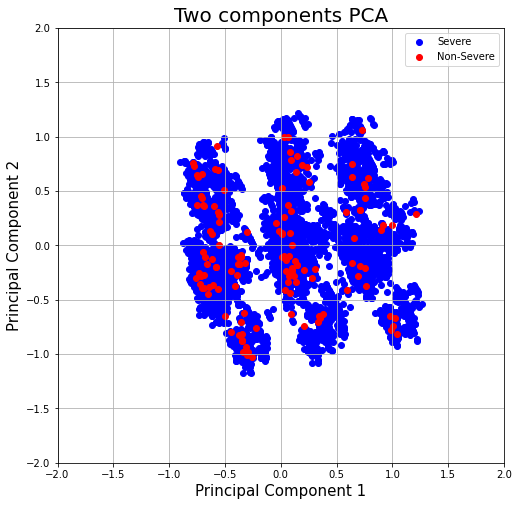

In [184]:
#  Plot
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

final_df = finalDf
not_severe_df = final_df[final_df['Severity'] == 0]
is_sever_df = final_df[final_df['Severity'] == 1]
plot1 = is_sever_df[['principal component 1', 'principal component 2']]
plot2 = not_severe_df[['principal component 1', 'principal component 2']]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('Two components PCA', fontsize=20)
plt.xlim([-2, 2])
plt.ylim([-2, 2])
targets = ['Severe', 'Non-Severe']
ax.scatter(plot2['principal component 1'], plot2['principal component 2'], color='b')
ax.scatter(plot1['principal component 1'], plot1['principal component 2'], color='r')
ax.legend(targets)
ax.grid()

# Set alphas - three components - maybe more

# Check three dimension plot

In [74]:
severity = df_model.groupby(['Severity'])['ID'].count().reset_index()

severity

,Severity,ID
0,0,108821
1,1,108821


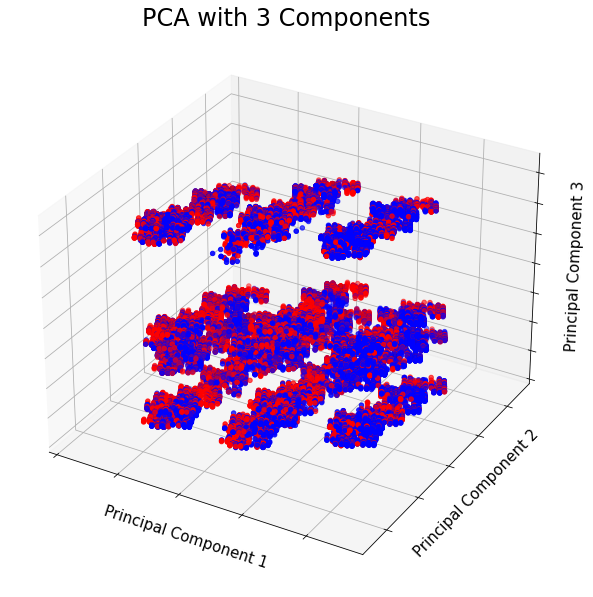

In [194]:
from sklearn.decomposition import PCA


X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

y = df_model['Severity'].values




def three_dim_pca(X, y):
    '''
    Plots 3D PCA factors and saves image
    '''
    fig = plt.figure(figsize=(10,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('PCA with 3 Components', fontsize = 24)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y,cmap='bwr_r')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.zaxis.get_ticklines():
        line.set_visible(False)
        
        
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

three_dim_pca(X_pca, y)

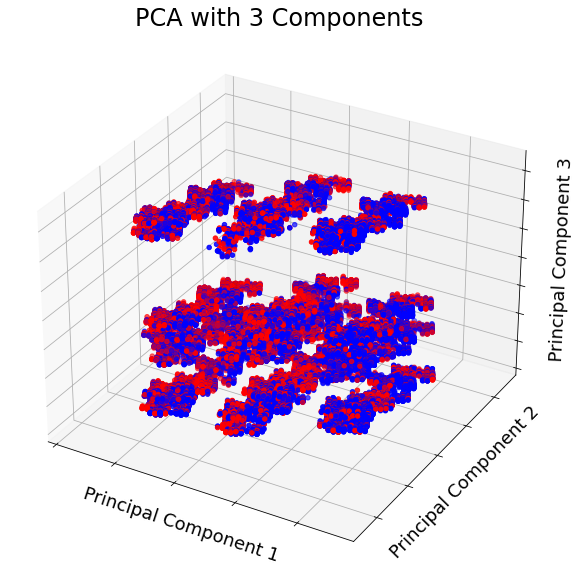

In [19]:
#  WITH DECOMPOSITION
from sklearn import decomposition
from sklearn.decomposition import PCA


X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Region_Midwest',
       'Region_Northeast', 'Region_Pacific', 'Region_Rockies',
       'Region_Southwest', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

y = df_model['Severity'].values




def three_dim_pca(X, y):
    '''
    Plots 3D PCA factors and saves image
    '''
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 18)
    ax.set_ylabel('Principal Component 2', fontsize = 18)
    ax.set_zlabel('Principal Component 3', fontsize = 18)
    ax.set_title('PCA with 3 Components', fontsize = 24)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y,cmap='bwr_r')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.zaxis.get_ticklines():
        line.set_visible(False)
        
        
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_ratio_)
# [0.13006069 0.11164325 0.10478885]
three_dim_pca(X_pca, y)
plt.savefig('PCA_plot_3.png',dpi=150, bbox_inches = 'tight')

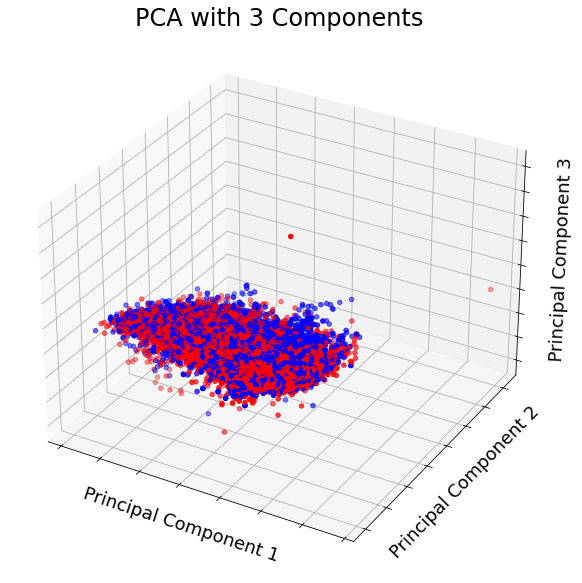

In [14]:
#  WITH DECOMPOSITION
from sklearn import decomposition
from sklearn.decomposition import PCA


X = df_model[['Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 
       'Junction', 
       'Traffic_Signal', 'Civil_Twilight', 'Rush Hour', 'Weekend', 'Side_R', 'Season_Spring', 'Season_Summer',
       'Season_Winter', 'Weather_Condition_Clear', 'Weather_Condition_Fog',
       'Weather_Condition_Other', 'Weather_Condition_Rain',
       'Weather_Condition_Snow', 'Weather_Condition_Thunderstorm']]

y = df_model['Severity'].values




def three_dim_pca(X, y):
    '''
    Plots 3D PCA factors and saves image
    '''
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('Principal Component 1', fontsize = 18)
    ax.set_ylabel('Principal Component 2', fontsize = 18)
    ax.set_zlabel('Principal Component 3', fontsize = 18)
    ax.set_title('PCA with 3 Components', fontsize = 24)
    ax.scatter(X[:,0], X[:,1], X[:,2], c=y,cmap='bwr_r')
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    for line in ax.xaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.yaxis.get_ticklines():
        line.set_visible(False)
    for line in ax.zaxis.get_ticklines():
        line.set_visible(False)
        
        
pca = decomposition.PCA(n_components=3)
X_pca = pca.fit_transform(X)
# print(pca.explained_variance_ratio_)
# [0.13006069 0.11164325 0.10478885]
three_dim_pca(X_pca, y)
plt.savefig('PCA_plot_3.png',dpi=150, bbox_inches = 'tight')